In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates
from skimage.feature import local_binary_pattern
from warnings import filterwarnings
filterwarnings("ignore")   

In [10]:
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

In [11]:
def compute_lbp(image, radius=1, neighbors=8):
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    padded_image = np.pad(image, pad_width=radius, mode='constant', constant_values=0)
    rows, cols = padded_image.shape

    lbp_image = np.zeros((rows - 2 * radius, cols - 2 * radius), dtype=np.uint8)

    angles = 2 * np.pi * np.arange(neighbors) / neighbors
    print(angles)
    dx = radius * np.cos(angles)
    dy = -radius * np.sin(angles)
    print(dx)
    print(dy)

    for i in range(radius, rows - radius):
        for j in range(radius, cols - radius):
            center_pixel = padded_image[i, j]
            binary_string = ''

            for k in range(neighbors):
                x = i + dy[k]
                y = j + dx[k]

                neighbor_pixel = map_coordinates(padded_image, [[x], [y]], order=0)[0]

                binary_string += '1' if neighbor_pixel >= center_pixel else '0'

            lbp_value = int(binary_string, 2)
            # print(binary_string, lbp_value, i-radius, j-radius)
            lbp_image[i - radius, j - radius] = lbp_value

    return lbp_image



In [12]:
def compute_lbp_predefined(image, radius=1, points=8):
    lbp = local_binary_pattern(image, points, radius, method="uniform")
    return lbp

In [13]:
def display_images(original_image, lbp_image):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image, cmap='gray')
    plt.title('LBP Image')
    plt.axis('off')

    plt.show()

In [14]:
def main(image_path):
    image = load_image(image_path)
    lbp_image = compute_lbp(image, radius=1, neighbors=8)
    display_images(image, lbp_image)
    print("Predefined LBP function")
    lbp_image = compute_lbp_predefined(image, radius=1, points=8)
    display_images(image, lbp_image)

[0.         0.78539816 1.57079633 2.35619449 3.14159265 3.92699082
 4.71238898 5.49778714]
[ 1.00000000e+00  7.07106781e-01  6.12323400e-17 -7.07106781e-01
 -1.00000000e+00 -7.07106781e-01 -1.83697020e-16  7.07106781e-01]
[-0.00000000e+00 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01
 -1.22464680e-16  7.07106781e-01  1.00000000e+00  7.07106781e-01]


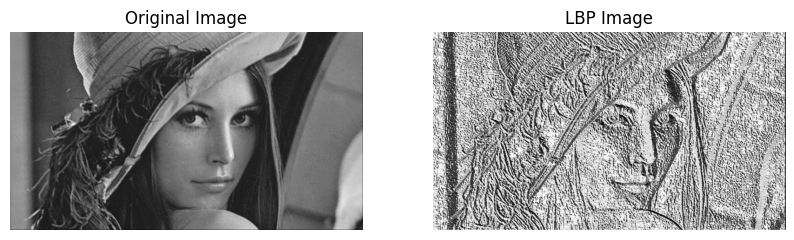

Predefined LBP function


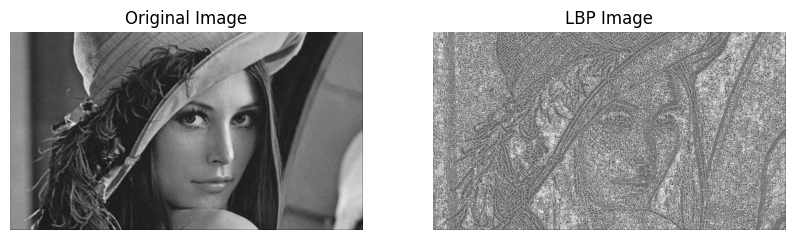

In [16]:
image_path = 'lenna.jpeg'
main(image_path)